# Module 4 Assignment
Using Wikipedias API, I wanted to collect data on Twitter and Kanye, to see if there was any correlations between Twitter and Kanye trending at the same time. 

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import wikifunctions as wf

# Analyze the data

In [2]:
page1_title = 'Kanye'
page2_title = 'Twitter'

enwiki_endpoint = 'en.wikipedia.org/w/api.php'

## Comparing article revision dynamics

### Comparing articles

In [3]:
page1_rev_df = wf.get_all_page_revisions(page1_title,endpoint=enwiki_endpoint)
page2_rev_df = wf.get_all_page_revisions(page2_title,endpoint=enwiki_endpoint)

Compare the number of revisions.

In [4]:
page1_rev_count = len(page1_rev_df)
page2_rev_count = len(page2_rev_df)
#page3_rev_count = len(page3_rev_df)
#page4_rev_count = len(page4_rev_df)

print("The '{0}' article has {1:,} revisions.".format(page1_title,page1_rev_count))
print("The '{0}' article has {1:,} revisions.".format(page2_title,page2_rev_count))
#print("The '{0}' article has {1:,} revisions.".format(page3_title,page3_rev_count))
#print("The '{0}' article has {1:,} revisions.".format(page4_title,page4_rev_count))

The 'Kanye' article has 14,226 revisions.
The 'Twitter' article has 7,975 revisions.


Count the total number of unique users for each article.

In [6]:
page1_user_count = len(page1_rev_df['user'].unique())
page2_user_count = len(page2_rev_df['user'].unique())
#page3_user_count = len(page3_rev_df['user'].unique())
#page4_user_count = len(page4_rev_df['user'].unique())

print("The '{0}' article has {1:,} unique editors.".format(page1_title,page1_user_count))
print("The '{0}' article has {1:,} unique editors.".format(page2_title,page2_user_count))
#print("The '{0}' article has {1:,} unique editors.".format(page3_title,page3_user_count))
#print("The '{0}' article has {1:,} unique editors.".format(page4_title,page4_user_count))

The 'Kanye' article has 5,366 unique editors.
The 'Twitter' article has 3,543 unique editors.


The first edit to the article.

In [7]:
page1_first_rev = min(page1_rev_df['date'])
page2_first_rev = min(page2_rev_df['date'])
#page3_first_rev = min(page3_rev_df['date'])
#page4_first_rev = min(page4_rev_df['date'])

print("The '{0}' article was first edited on {1:}.".format(page1_title,page1_first_rev))
print("The '{0}' article was first edited on {1:}.".format(page2_title,page2_first_rev))
#print("The '{0}' article was first edited on {1:}.".format(page3_title,page3_first_rev))
#print("The '{0}' article was first edited on {1:}.".format(page4_title,page4_first_rev))

The 'Kanye' article was first edited on 2004-03-13.
The 'Twitter' article was first edited on 2007-02-12.


Plot out how the size of the articles have changed.

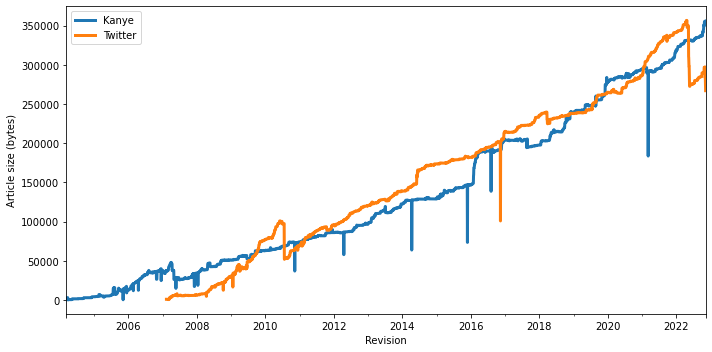

In [8]:
f,ax = plt.subplots(1,1,figsize=(10,5))

page1_size_agg = page1_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'size':'median'}).fillna(method='ffill')
page2_size_agg = page2_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'size':'median'}).fillna(method='ffill')
#page3_size_agg = page3_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'size':'median'}).fillna(method='ffill')
#page4_size_agg = page4_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'size':'median'}).fillna(method='ffill')

page1_size_agg.columns = [page1_title]
page2_size_agg.columns = [page2_title]
#page3_size_agg.columns = [page3_title]
#page4_size_agg.columns = [page4_title]

page1_size_agg.plot(ax=ax,lw=3)
page2_size_agg.plot(ax=ax,lw=3)
#page3_size_agg.plot(ax=ax,lw=3)
#page4_size_agg.plot(ax=ax,lw=3)

ax.set_xlabel('Revision')
ax.set_ylabel('Article size (bytes)')

# f.legend(loc='center left',bbox_to_anchor=(1,.5))
f.tight_layout()

Plot out the number of revisions per day with a rolling 28-day average.

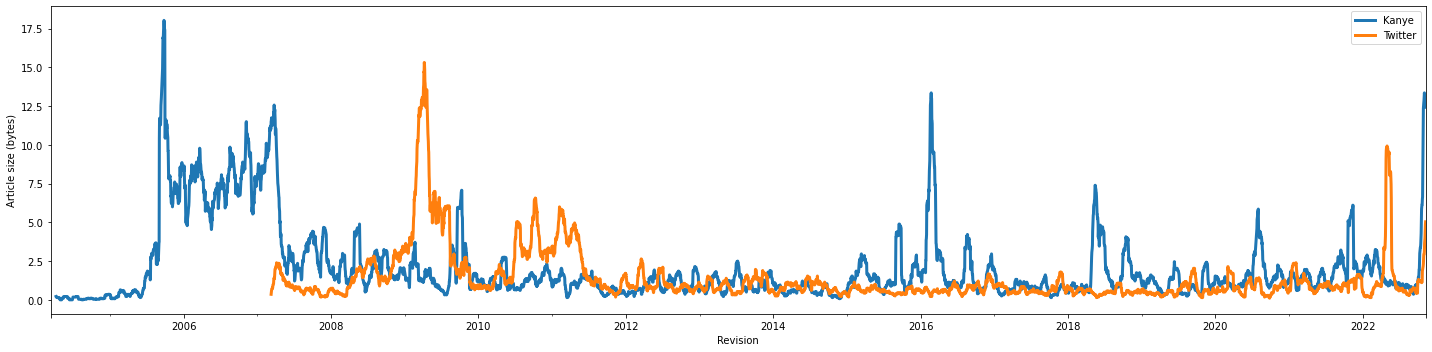

In [9]:
f,ax = plt.subplots(1,1,figsize=(20,5))

page1_size_agg = page1_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'revid':'nunique'})
page2_size_agg = page2_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'revid':'nunique'})
#page3_size_agg = page3_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'revid':'nunique'})
#page4_size_agg = page4_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'revid':'nunique'})

page1_size_agg.columns = [page1_title]
page2_size_agg.columns = [page2_title]
#page3_size_agg.columns = [page3_title]
#page4_size_agg.columns = [page4_title]

page1_size_agg.rolling(28).mean().plot(ax=ax,lw=3)
page2_size_agg.rolling(28).mean().plot(ax=ax,lw=3)
#page3_size_agg.rolling(28).mean().plot(ax=ax,lw=3)
#page4_size_agg.rolling(28).mean().plot(ax=ax,lw=3)

ax.set_xlabel('Revision')
ax.set_ylabel('Article size (bytes)')

# f.legend(loc='center left',bbox_to_anchor=(1,.5))
f.tight_layout()

In [12]:
page1_rev_df.keys()

Index(['revid', 'parentid', 'user', 'anon', 'userid', 'timestamp', 'size',
       'sha1', 'comment', 'sha1hidden', 'suppressed', 'commenthidden', 'page',
       'date', 'diff', 'lag', 'age'],
      dtype='object')

### Comparing languages

The `get_interlanguage_links` will return a dictionary keyed by language code and valued by the Wikipedia article title in that language.

In [19]:
page1_ill = wf.get_interlanguage_links(page1_title,endpoint='en.wikipedia.org/w/api.php')
page1_ill

{'en': 'Kanye West',
 'an': 'Kanye West',
 'ar': 'كانييه ويست',
 'arz': 'كانييه ويست',
 'ast': 'Kanye West',
 'az': 'Kanye Vest',
 'azb': 'کانیه وست',
 'be': 'Канье Уэст',
 'be-x-old': 'Канье Ўэст',
 'bg': 'Кание Уест',
 'bjn': 'Kanye West',
 'bn': 'কানইয়ে ওয়েস্ট',
 'ca': 'Kanye West',
 'ckb': 'کانیێ وێست',
 'cs': 'Kanye West',
 'da': 'Kanye West',
 'de': 'Kanye West',
 'din': 'Kanye West',
 'el': 'Κάνιε Γουέστ',
 'eml': 'Kanye West',
 'eo': 'Kanye West',
 'es': 'Kanye West',
 'et': 'Kanye West',
 'fa': 'کانیه وست',
 'fi': 'Kanye West',
 'fr': 'Kanye West',
 'fy': 'Kanye West',
 'ga': 'Kanye West',
 'gl': 'Kanye West',
 'he': 'קניה וסט',
 'hi': 'कान्ये वेस्ट',
 'hr': 'Kanye West',
 'hu': 'Kanye West',
 'hy': 'Քանյե Ուեսթ',
 'hyw': 'Քանյէ Ուեսթ',
 'id': 'Kanye West',
 'ig': 'Kanyé West',
 'is': 'Kanye West',
 'it': 'Kanye West',
 'ja': 'カニエ・ウェスト',
 'ka': 'კანიე უესტი',
 'ko': '카니예 웨스트',
 'ku': 'Kanye West',
 'la': 'Kanye West',
 'lt': 'Kanye West',
 'lv': 'Kanje Vests',
 'mg': 'Kanye 

Translate links in other languages using the `get_interlanguage_links` and (hopefully!) finding the English article.

In [22]:
wf.get_interlanguage_links('كانييه ويست',endpoint='ar.wikipedia.org/w/api.php')['en']

'Kanye West'

Which means you can (potentially!) translate most of the links on other languages' pages back to English.

In [23]:
# Get all of the outlinks on the Arabic Darth Vader article, use set to remove duplicates
page1_ill_ar = set(wf.get_page_outlinks('كانييه ويست',endpoint='ar.wikipedia.org/w/api.php'))

# For each link on the Arabic version of the article
for link in page1_ill_ar:
    # Get that link's inter-language links
    ill = wf.get_interlanguage_links(link,endpoint='ar.wikipedia.org/w/api.php')
    
    # If there's an English version of the article, print out the Arabic and English
    if 'en' in ill.keys():
        print("'{0}' is Arabic for '{1}'".format(link,ill['en']))
        
    # Otherwise print there's no corresponding English link
    else:
        print("Wikipedia has no English link for '{0}'".format(link))

'الانتخابات الرئاسية الأمريكية 2020' is Arabic for '2020 United States presidential election'
'بوابة:موسيقى' is Arabic for 'Portal:Music'
'ميتاكريتيك' is Arabic for 'Metacritic'
'بوابة:بيرو' is Arabic for 'Portal:Peru'
'ألو سيني' is Arabic for 'AlloCiné'
'بيونسي نولز' is Arabic for 'Beyoncé'
'2020' is Arabic for '2020'
Wikipedia has no English link for 'بوابة:تمثيل'
'بوابة:السياسة' is Arabic for 'Portal:Politics'
'إخراج' is Arabic for 'Film director'
'تصميم أزياء' is Arabic for 'Fashion design'
'جائزة غرامي' is Arabic for 'Grammy Awards'
'برنامج التبادل الطلابي' is Arabic for 'Student exchange program'
'ليدي غاغا' is Arabic for 'Lady Gaga'
'إم تي في' is Arabic for 'MTV'
'لويس فويتون' is Arabic for 'Louis Vuitton'
'فوربس (مجلة)' is Arabic for 'Forbes'
'نايكي' is Arabic for 'Nike, Inc.'
'بوابة:موضة' is Arabic for 'Portal:Fashion'
'الولايات المتحدة' is Arabic for 'United States'
'اللغة الإنجليزية' is Arabic for 'English language'
'عيد الشكر' is Arabic for 'Thanksgiving'
'جيمي فوكس' is Ara

Get the page revisions in other languages.

In [25]:
page1_title_ar = page1_ill['ar']
page1_title_pt = page1_ill['pt']
page1_title_zh = page1_ill['zh']

print("The name of '{0}' in Arabic is: '{1}'".format(page1_title,page1_title_ar))
print("The name of '{0}' in Portugese is: '{1}'".format(page1_title,page1_title_pt))
print("The name of '{0}' in Chinese is: '{1}'".format(page1_title,page1_title_zh))

page1_en_rev_df = wf.get_all_page_revisions(page1_title,endpoint='en.wikipedia.org/w/api.php')
page1_ar_rev_df = wf.get_all_page_revisions(page1_title_ar,endpoint='ar.wikipedia.org/w/api.php')
page1_pt_rev_df = wf.get_all_page_revisions(page1_title_pt,endpoint='pt.wikipedia.org/w/api.php')
page1_zh_rev_df = wf.get_all_page_revisions(page1_title_zh,endpoint='zh.wikipedia.org/w/api.php')

The name of 'Kanye' in Arabic is: 'كانييه ويست'
The name of 'Kanye' in Portugese is: 'Kanye West'
The name of 'Kanye' in Chinese is: '肯伊·威斯特'


Plot out how the size of the articles have changed.

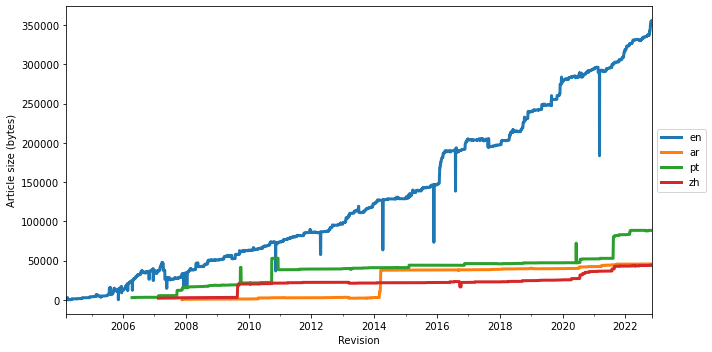

In [26]:
f,ax = plt.subplots(1,1,figsize=(10,5))

page1_en_size_agg = page1_en_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'size':'median'}).fillna(method='ffill')
page1_ar_size_agg = page1_ar_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'size':'median'}).fillna(method='ffill')
page1_pt_size_agg = page1_pt_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'size':'median'}).fillna(method='ffill')
page1_zh_size_agg = page1_zh_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'size':'median'}).fillna(method='ffill')

page1_en_size_agg.columns = ['en']
page1_ar_size_agg.columns = ['ar']
page1_pt_size_agg.columns = ['pt']
page1_zh_size_agg.columns = ['zh']

page1_en_size_agg.plot.line(ax=ax,lw=3)
page1_ar_size_agg.plot.line(ax=ax,lw=3)
page1_pt_size_agg.plot.line(ax=ax,lw=3)
page1_zh_size_agg.plot.line(ax=ax,lw=3)

ax.set_xlabel('Revision')
ax.set_ylabel('Article size (bytes)')

ax.legend(loc='center left',bbox_to_anchor=(1,.5))
f.tight_layout()

## Comparing pageview dynamics

### Comparing languages

In [27]:
page1_en_pv = wf.get_pageviews(page1_title,endpoint='en.wikipedia.org')
page1_ar_pv = wf.get_pageviews(page1_title_ar,endpoint='ar.wikipedia.org')
page1_pt_pv = wf.get_pageviews(page1_title_pt,endpoint='pt.wikipedia.org')
page1_zh_pv = wf.get_pageviews(page1_title_zh,endpoint='zh.wikipedia.org')

page1_pv_df = pd.DataFrame({'en':page1_en_pv,'ar':page1_ar_pv,'pt':page1_pt_pv,'zh':page1_zh_pv})
page1_pv_df.head()

,en,ar,pt,zh
timestamp,,,,
2015-07-01,81,129,456,239
2015-07-02,88,104,464,222
2015-07-03,80,107,426,141
2015-07-04,65,114,384,157
2015-07-05,74,108,374,119


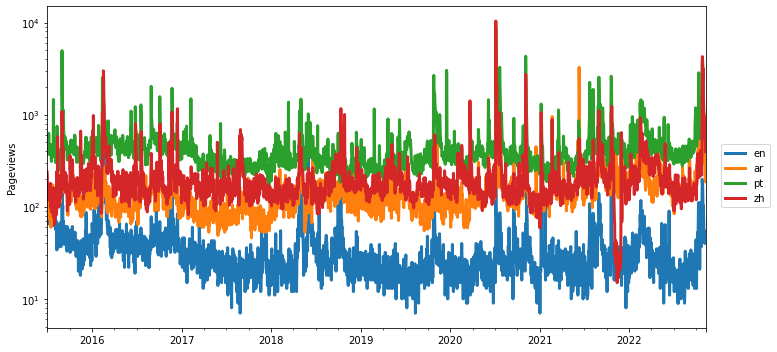

In [28]:
f,ax = plt.subplots(1,1,figsize=(10,5))

page1_pv_df.plot(ax=ax,legend=False,lw=3)
f.legend(loc='center left',bbox_to_anchor=(1,.5))

ax.set_xlabel(None)
ax.set_ylabel('Pageviews')
ax.set_yscale('log')

f.tight_layout()

### Comparing articles

In [31]:
page1_en_pv = wf.get_pageviews(page1_title,endpoint='en.wikipedia.org')
page2_en_pv = wf.get_pageviews(page2_title,endpoint='en.wikipedia.org')

page1and2_pv_df = pd.DataFrame({'Kanye West':page1_en_pv,'Twitter':page2_en_pv})
page1and2_pv_df.head()

,Kanye West,Twitter
timestamp,,
2015-07-01,81,10475
2015-07-02,88,10218
2015-07-03,80,9336
2015-07-04,65,8491
2015-07-05,74,8550


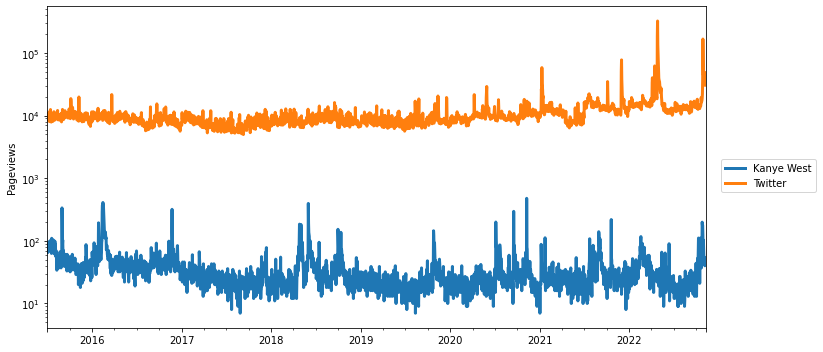

In [32]:
f,ax = plt.subplots(1,1,figsize=(10,5))

page1and2_pv_df.plot(ax=ax,legend=False,lw=3)
f.legend(loc='center left',bbox_to_anchor=(1,.5))

ax.set_xlabel(None)
ax.set_ylabel('Pageviews')
ax.set_yscale('log')

f.tight_layout()

Month of October data from Wikipedia Below

In [4]:
oct2022df = pd.read_csv('pageviews-20221001-20221031.csv')
oct2022df

,Date,Kanye West,Twitter
0,2022-10-01,12683,13463
1,2022-10-02,13435,13224
2,2022-10-03,19099,13834
3,2022-10-04,27584,16960
4,2022-10-05,25609,18275
5,2022-10-06,27394,15296
6,2022-10-07,115467,13699
7,2022-10-08,81246,12592
8,2022-10-09,51609,14296
9,2022-10-10,62878,14910


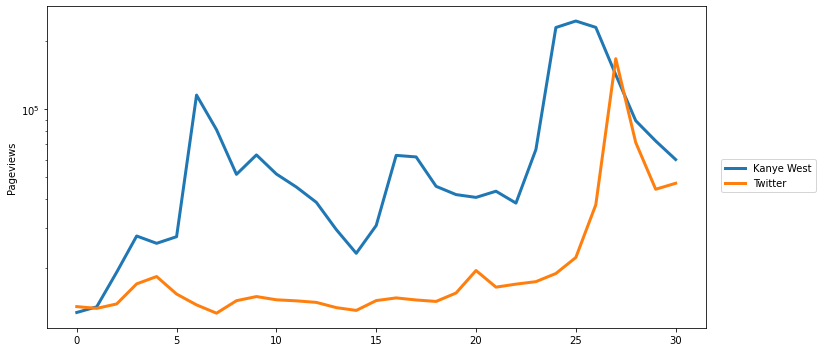

In [18]:
f,ax = plt.subplots(1,1,figsize=(10,5))

oct2022df.plot(ax=ax,legend=False,lw=3)
f.legend(loc='center left',bbox_to_anchor=(1,.5))

ax.set_xlabel(None)
ax.set_ylabel('Pageviews')
ax.set_yscale('log')

f.tight_layout()

Text(0, 0.5, 'Count')

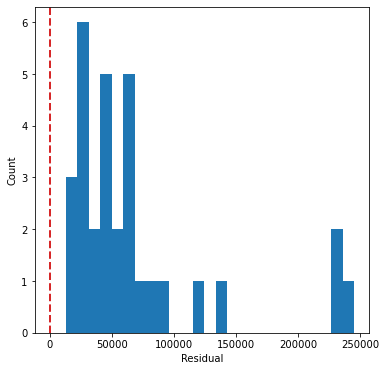

In [6]:
f,ax = plt.subplots(figsize=(6,6))

oct2022df['Kanye West'].hist(bins=25,ax=ax)
ax.grid(None)
#ax.axvline(counties_df['grad_state_residuals'].mean(),c='tab:green',lw=2)
ax.axvline(0,c='tab:red',lw=2,ls='--')
ax.set_xlabel('Residual')
ax.set_ylabel('Count')

In [13]:
# pulling out the date from October 7th, as this was when Kanye Tweeted about how he would go deathcon3 on 
# jewish people (it was later deleted)
# people then stormed twitter to find the tweet (increasing searches)
oct7df = oct2022df[oct2022df['Date'] == '2022-10-07']
oct7df

,Date,Kanye West,Twitter
6,2022-10-07,115467,13699


In [15]:
oct26df = oct2022df[oct2022df['Date'] == '2022-10-26']
oct26df

,Date,Kanye West,Twitter
25,2022-10-26,245121,22178


In [43]:
oct2022df.corr()

,Kanye West,Twitter
Kanye West,1.000000,0.322896
Twitter,0.322896,1.000000


In [46]:
revs_en_df = wf.get_all_page_revisions('Kanye West',endpoint='en.wikipedia.org/w/api.php')
revs_en_df.head()

,revid,parentid,user,anon,userid,timestamp,size,sha1,comment,sha1hidden,suppressed,commenthidden,page,date,diff,lag,age
0,2811916,0,66.67.199.55,True,0,2004-03-13 03:13:30+00:00,123,4c3528f6cfea36339679f560541d5dd45da1bb00,,NaN,NaN,NaN,Kanye West,2004-03-13,NaN,NaN,0.000000
1,2951815,2811916,172.134.10.167,True,0,2004-03-18 00:53:53+00:00,2866,b8207fd1f135fdd3ac8579cfedefaf30bd60b2d7,,NaN,NaN,NaN,Kanye West,2004-03-18,2743.0,423623.0,4.903044
2,3011485,2951815,68.166.68.210,True,0,2004-03-28 07:18:29+00:00,105,2c381df9705d551941899ad2e700f356a00ecba4,removed plagarized content,NaN,NaN,NaN,Kanye West,2004-03-28,-2761.0,887076.0,15.170127
3,3011488,3011485,161.115.209.6,True,0,2004-04-01 18:00:06+00:00,351,7a8ca5813a83e570066500c7ea04ceb9ce6440e6,,NaN,NaN,NaN,Kanye West,2004-04-01,246.0,384097.0,19.615694
4,3011499,3011488,161.115.209.6,True,0,2004-04-01 18:00:22+00:00,351,f777af1f6ef958e09274ab3eb44b828488d2b7b4,,NaN,NaN,NaN,Kanye West,2004-04-01,0.0,16.0,19.615880
